In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist["data"][0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib.pyplot as plt

In [12]:
test_digit = X[0]
test_ditit_img = test_digit.reshape(28,28)

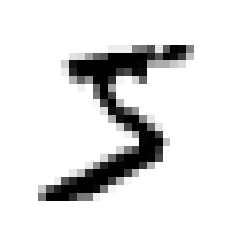

In [13]:
plt.imshow(test_ditit_img, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y[0]

'5'

In [15]:
import matplotlib as mpl
import numpy as np

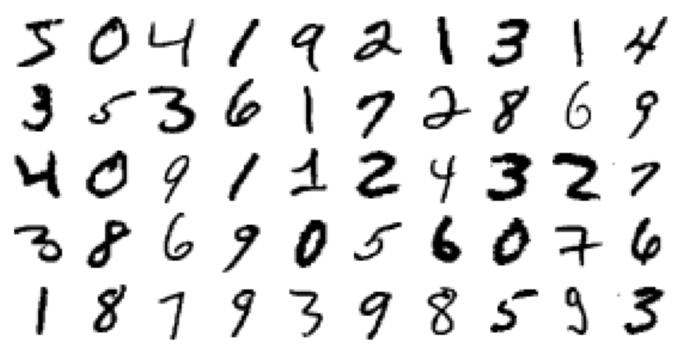

In [16]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(12,12))
plot_images_matrix(X[0:50], 28, 10)
plt.show()

In [17]:
A = [[1,2,3],[4,5,6],[7,8,9]]

In [18]:
np.concatenate([A,A], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]])

In [19]:
np.concatenate([A,A], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
y = y.astype(np.int32)
y

array([5, 0, 4, ..., 4, 5, 6])

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
y_train_5 = y_train == 5
y_train_5[0:20]

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
model = SGDClassifier(loss="log", random_state=42)
model.fit(X_train, y_train_5)

SGDClassifier(loss='log', random_state=42)

In [56]:
model.predict(X_test[0:20])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

In [57]:
y_test[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(model, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9648 , 0.9695 , 0.96745])

In [29]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
    
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [30]:
never_5_clf.predict(X_test[0:20])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [32]:
y_train_pred = cross_val_predict(model, X_train, y_train_5, cv=3)

In [33]:
confusion_matrix(y_train_5, y_train_pred)

array([[54129,   450],
       [ 1515,  3906]], dtype=int64)

In [37]:
# precision
print(3906/(3906+450))
# recall
print(3906/(3906+1515))

0.8966942148760331
0.7205312672938572


In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_train_5, y_train_pred)

0.8966942148760331

In [40]:
recall_score(y_train_5, y_train_pred)

0.7205312672938572

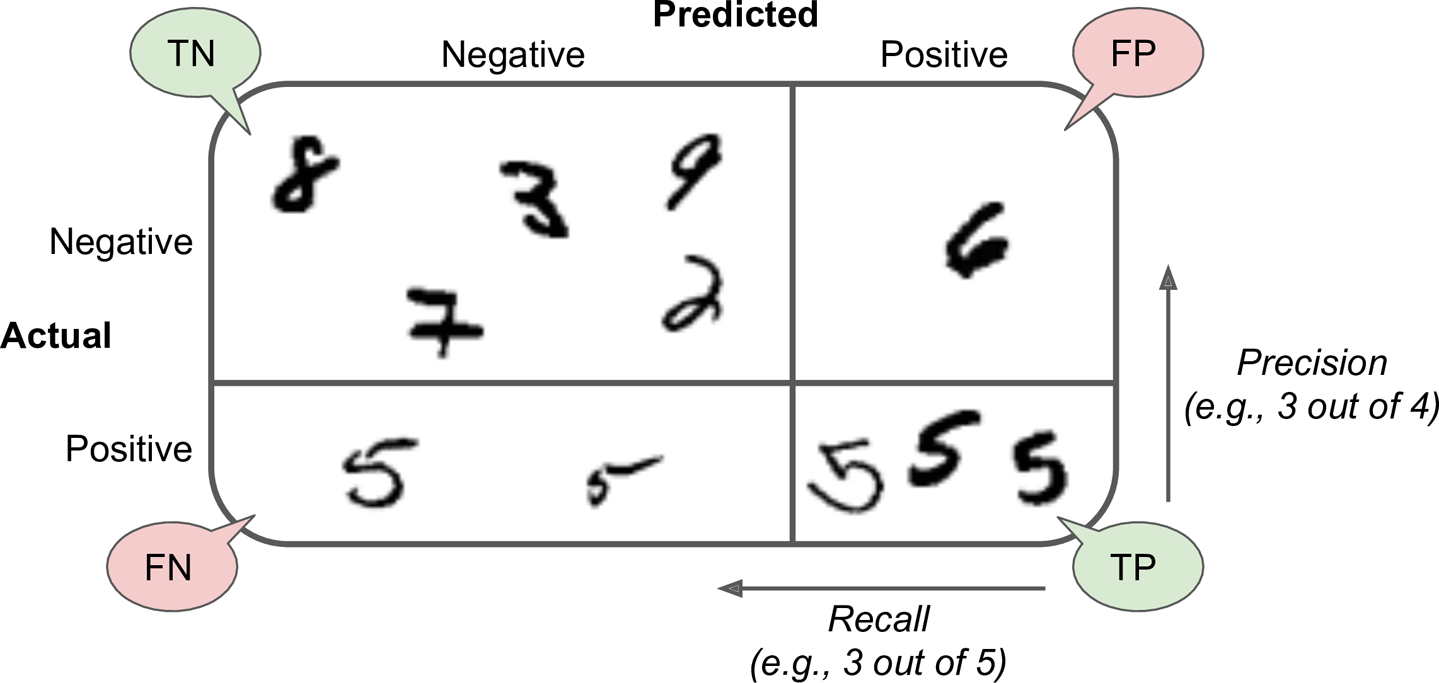

In [36]:
confusion_matrix(y_train_5, y_train_5) # ideal

array([[54579,     0],
       [    0,  5421]], dtype=int64)

$$precision = \dfrac{TP}{TP+FP}$$

$$recall = \dfrac{TP}{TP+FN}$$

$$F1 = \dfrac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}} = 2\times\dfrac{precision\times recall}{precision+recall} = \dfrac{TP}{TP+\dfrac{FN+FP}{2}} $$

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_train_5, y_train_pred)

0.7990181037127954

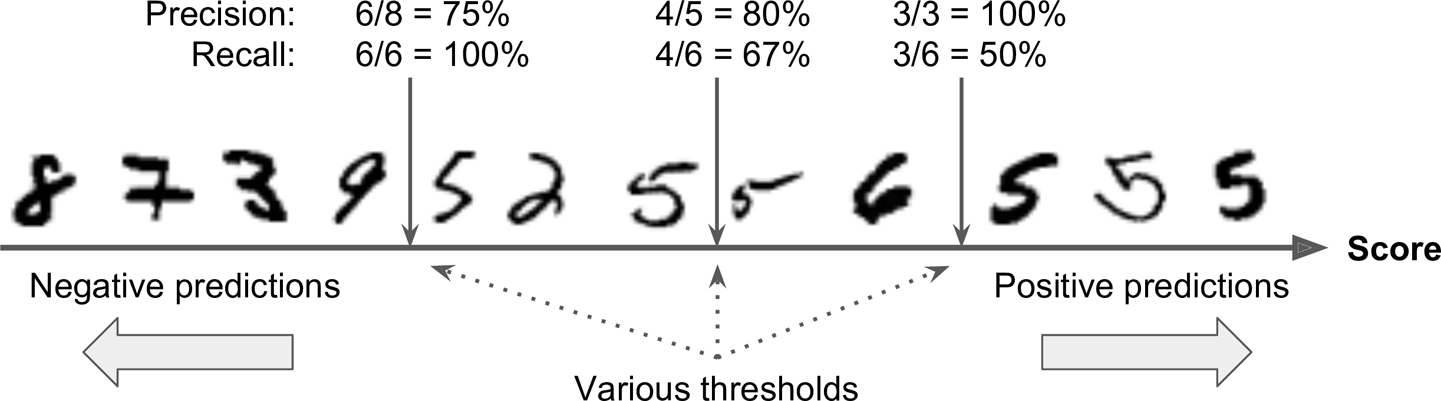

In [51]:
y_train_pred[0:20]

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [59]:
y_scores = cross_val_predict(model, X_train, y_train_5, cv=3, method="decision_function")

In [60]:
y_scores[0:20]

array([   311.13407542, -19349.70609561, -29995.51550559, -13755.63023564,
       -18629.70738475, -13972.11950808, -13249.80008729, -20122.98631555,
        -6130.71117637,  -8249.33780856, -18085.67732175,   3704.88272353,
       -26328.97315647, -14817.31343059,  -5593.37016551, -12778.18588236,
       -21101.31276226, -11582.56273001,  -4590.76319851, -19520.55607153])

In [61]:
from sklearn.metrics import precision_recall_curve

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

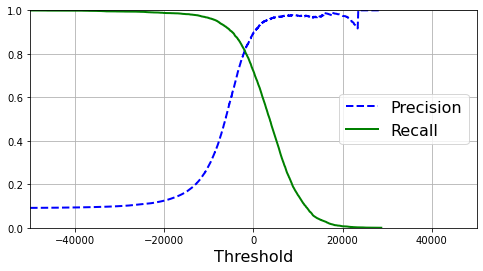

In [66]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [68]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

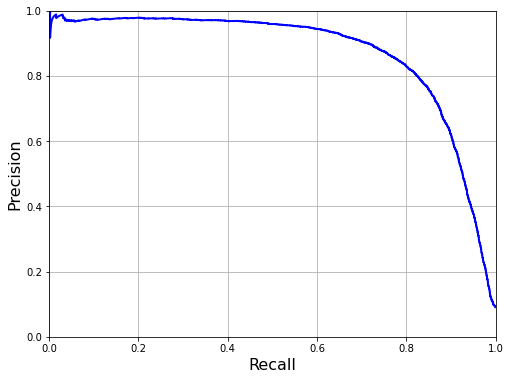

In [69]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [76]:
thresholds[np.argmax(precisions>=0.95)]

2442.9478116671007

In [78]:
recalls[np.argmax(precisions>=0.95)]

0.575908503966058

In [ ]:
[56619]